In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 使用numpy生成数据集

In [27]:
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]  # 200, 1
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise                  # 200, 1
print(y_data.shape)
# 定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

(200, 1)


### 定义神经网络的中间层（10个unit）和输出层

In [36]:
weights_l1 = tf.Variable(tf.random_normal([1, 10]))
biases_l1 = tf.Variable(tf.zeros([1, 10]))
wx_plus_b_l1 = tf.matmul(x, weights_l1) + biases_l1
l1 = tf.nn.tanh(wx_plus_b_l1)
# print(l1.shape)
weights_l2 = tf.Variable(tf.random_normal([10, 1]))
biases_l2 = tf.Variable(tf.random_normal([1, 1]))
wx_plus_b_l2 = tf.matmul(l1, weights_l2) + biases_l2
prediction = tf.nn.tanh(wx_plus_b_l2)
# print(wx_plus_b_l2.shape)

### 定义优化器

In [37]:
loss = tf.reduce_mean(tf.square(y-prediction))
optimizer_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

### 启动会话与可视化

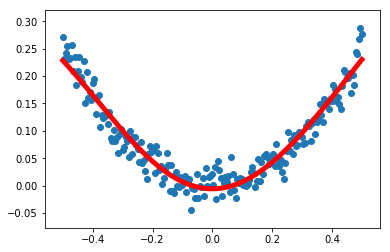

In [42]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(optimizer_step, feed_dict={x:x_data, y:y_data})
    prediction_value = sess.run(prediction, feed_dict={x:x_data})  # 预测的y值
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()
    